 #                                         Speech-To-Text

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

### Spectrogram

#### In below blog they tried with sample of wave file 
        https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

#### Lets try with other feature like spectrogram
        Data : https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

In [14]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'

In [15]:
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [2]:
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
from shutil import copy2 as cp

In [3]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [4]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-3-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([14, 23, 19, ..., 19, 22, 24], dtype=int16), 16000)

In [5]:
def graph_spectrogram(wavname):
    sound_info, frame_rate = get_wav_info(wavname)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['savefig.facecolor'] = 'black'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['lines.color'] = 'white'
    plt.rcParams['text.color'] = 'white'    
    plt.rcParams['xtick.color'] = 'white'    
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    fig = plt.figure(num=None, figsize=(12, 7.5), dpi=90)
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
    ax.tick_params(axis='both', direction='inout')
    plt.title('Spectrogram')
    plt.xlabel('time in seconds')
    plt.ylabel('Frequency (Khz)')
    plt.specgram(sound_info, Fs=frame_rate, cmap='gnuplot')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('dB')
    

<ipython-input-3-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


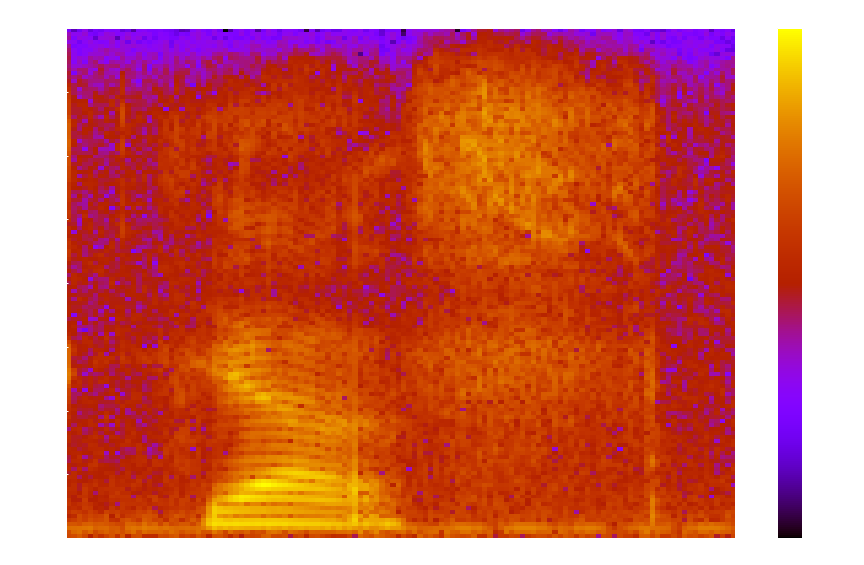

In [6]:
graph_spectrogram(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-7-335fa980a1ff>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


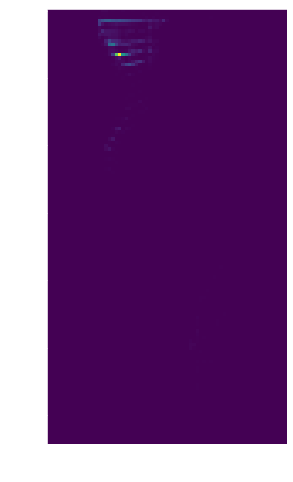

In [7]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [187]:
samples.size

16000

<ipython-input-9-aee4b22a3610>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


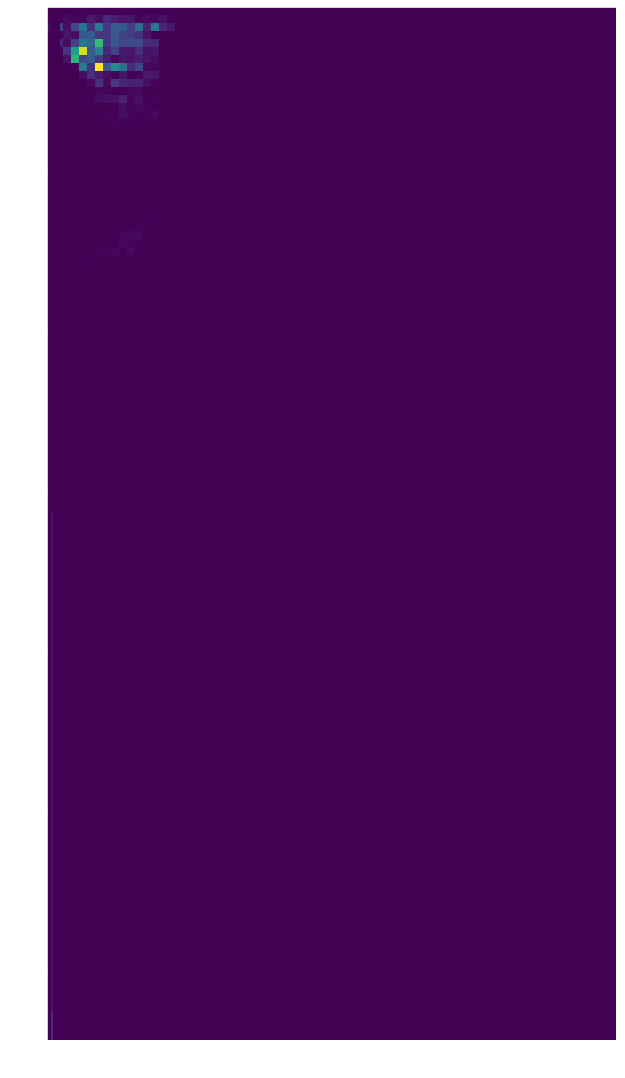

In [9]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/c1e0e8e3_nohash_2.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,19))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [10]:
times


array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

In [11]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [12]:
spectrogram

array([[3.00019264e+00, 2.95396179e+02, 5.75027344e+02, ...,
        1.79564282e-02, 1.45896345e-01, 1.08136326e-01],
       [1.98152087e+03, 1.29215466e+03, 3.45545435e+03, ...,
        2.68431716e-02, 8.66682976e-02, 8.95222574e-02],
       [4.03468701e+03, 2.29850859e+04, 4.63264746e+03, ...,
        1.47732571e-01, 1.38542557e+00, 2.04377007e+00],
       ...,
       [2.17786214e-06, 7.21325159e-06, 9.72227735e-06, ...,
        6.62526872e-05, 3.59796650e-05, 3.57009048e-05],
       [2.56235626e-06, 4.23171005e-05, 9.75406783e-06, ...,
        3.12677876e-04, 1.18152806e-04, 2.74950253e-05],
       [1.65188965e-06, 3.33031221e-06, 1.68632978e-05, ...,
        4.31949911e-06, 1.89926450e-05, 2.40293417e-07]], dtype=float32)

### Load Audio Data

In [233]:
data = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        files = os.listdir(os.path.join(audios_dir,d))
        audios = [f for f in files if f.endswith('.wav')]
        for file in audios:
            # load the image, swap color channels, and resize it to be a fixed
            # 224x224 pixels while ignoring aspect ratio
            #file = audios[i]
            sample_rate, samples = wavfile.read(os.path.join(audios_dir,d,file))
            # convert the image data to NumPy arrays while scaling the pixel
            # intensities to the range [0, 255]
            #image = np.array(image)/255.0
            if (samples.size == 16000):
                data.append(samples)
                labels.append(d)  # d est nom du dossier
            #else:
             #   print(spectrogram.shape)


down
go
left
no
off
on
right
stop
up
yes


In [191]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [192]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [193]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [194]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [234]:
data = np.array(data)

In [196]:
data.shape

(21312, 16000)

### Class distribution

In [210]:
values,count = np.unique(labels,return_counts=True)

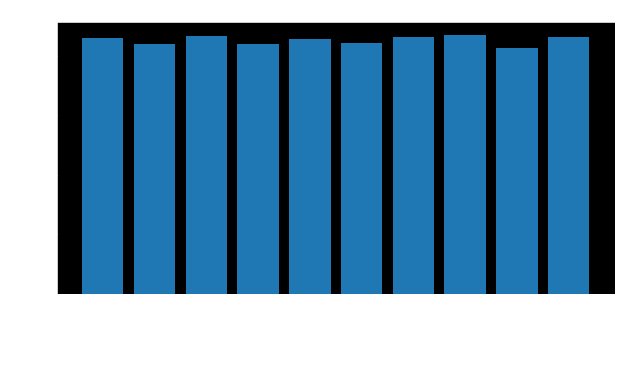

In [211]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(words))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, words, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [212]:
len(labels)

21312

In [213]:
labels_backup = labels

In [214]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [215]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [216]:
labels_categoricals = to_categorical(ls)

In [217]:
labels_categoricals

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [218]:
labels_categoricals.shape

(21312, 10)

### Data splitting - Train,CV and Test 

In [235]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [236]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (12786, 16000)
Cross-Validation data size :  (4263, 16000)
Test data size :  (4263, 16000)


In [238]:
trainX.shape


(12786, 16000)

In [231]:
trainX

array([[   11.,    12.,    11., ...,    10.,     7.,    19.],
       [   40.,    63.,    52., ...,     2.,     5.,     6.],
       [   -2.,    -3.,    -3., ...,    21.,    17.,    21.],
       ...,
       [    5.,  1455.,  -853., ...,   101.,   995., -1937.],
       [  -51.,  -106.,  -170., ...,  -299.,  -239.,  -181.],
       [  119.,   128.,   114., ...,  -155.,  -158.,  -140.]],
      dtype=float32)

In [251]:
trainX = trainX.reshape(trainX.shape[0],16000, 1)
testX = testX.reshape(testX.shape[0], 16000, 1)
cvX = cvX.reshape(cvX.shape[0], 16000, 1)

In [252]:
trainX.shape

(12786, 16000, 1)

In [154]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 14208 and each image is of shape : (14208, 1)
Number of cross validation examples : 4737 and each image is of shape : (4737, 1)
Number of testing examples : 4737 and each image is of shape : (4737, 1)


### VGG16 Model

In [36]:
!pip install nvidia-ml-py3 

In [253]:
import tensorflow as tf

In [254]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

RuntimeError: Physical devices cannot be modified after being initialized

In [255]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: Physical devices cannot be modified after being initialized

In [155]:

#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 150
batch_size = 32
num_class = 10
#input_shape = (224,224,3) #(513, 800, 3)

In [156]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import (BatchNormalization)

from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input

In [241]:
trainX = np.asarray(trainX).astype(np.float32)
trainY = np.asarray(trainY).astype(np.float32)

In [222]:
trainX[250].size

16000

In [256]:
input_shape = (16000, 1)

model = Sequential()
model.add(Conv1D(8, kernel_size=2,padding='same',activation='relu',input_shape=input_shape))
model.add(Conv1D(16, kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(32, kernel_size=2,padding='same',activation='relu'))
model.add(Conv1D(64, kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(128, kernel_size=2,padding='same',activation='relu'))
model.add(Conv1D(256, kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_95 (Conv1D)          (None, 16000, 8)          24        
                                                                 
 conv1d_96 (Conv1D)          (None, 16000, 16)         272       
                                                                 
 max_pooling1d_46 (MaxPoolin  (None, 4000, 16)         0         
 g1D)                                                            
                                                                 
 batch_normalization_39 (Bat  (None, 4000, 16)         64        
 chNormalization)                                                
                                                                 
 dropout_51 (Dropout)        (None, 4000, 16)          0         
                                                                 
 conv1d_97 (Conv1D)          (None, 4000, 32)        

In [257]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [258]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [259]:

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
400/400 [==============================] - 28s 37ms/step - loss: 3.3328 - accuracy: 0.2012 - val_loss: 2.2639 - val_accuracy: 0.1229
Epoch 2/150
400/400 [==============================] - 14s 35ms/step - loss: 1.9517 - accuracy: 0.2780 - val_loss: 2.1320 - val_accuracy: 0.1879
Epoch 3/150
400/400 [==============================] - 14s 35ms/step - loss: 1.8570 - accuracy: 0.3122 - val_loss: 2.0177 - val_accuracy: 0.2463
Epoch 4/150
400/400 [==============================] - 14s 35ms/step - loss: 1.7857 - accuracy: 0.3386 - val_loss: 1.9187 - val_accuracy: 0.2766
Epoch 5/150
400/400 [==============================] - 14s 35ms/step - loss: 1.7300 - accuracy: 0.3614 - val_loss: 1.8509 - val_accuracy: 0.2930
Epoch 6/150
400/400 [==============================] - 14s 35ms/step - loss: 1.6492 - accuracy: 0.3826 - val_loss: 1.6884 - val_accuracy: 0.3962
Epoch 7/150
400/400 [==============================] - 14s 35ms/step - loss: 1.5981 - accuracy: 0.4112 - val_loss: 1.5699 - val_ac

In [260]:
model.save("C:/Users/Tuf F15/Desktop/DATASET/rawMethod")

INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/rawMethod\assets


INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/rawMethod\assets


ValueError: x and y must have same first dimension, but have shapes (150,) and (60,)

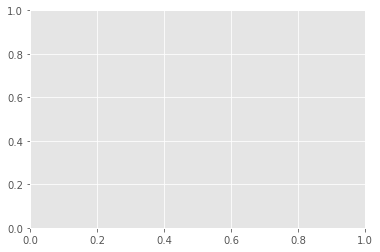

In [261]:
# plot the training loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train/CV Loss on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

ValueError: x and y must have same first dimension, but have shapes (150,) and (143,)

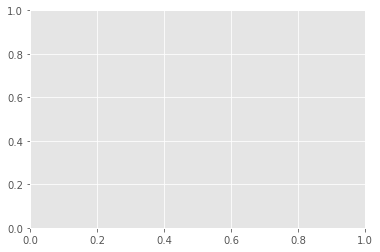

In [53]:
# plot the training accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and CV Accuracy on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [262]:
best_acc = max(history.history["val_accuracy"])

In [263]:
best_acc*100

74.14966225624084

In [264]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=batch_size)

134/134 [==============================] - 1s 10ms/step


In [265]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [266]:
def plot_Confusion_Matrix(actual_labels,predict_labels,title):
    """This function plot the confusion matrix"""
    # Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cm = confusion_matrix(actual_labels, predict_labels)
    classNames = words
    cm_data = pd.DataFrame(cm,index = classNames,
                  columns = classNames)
    plt.figure(figsize = (8,8))
    sns.heatmap(cm_data, annot=True,fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


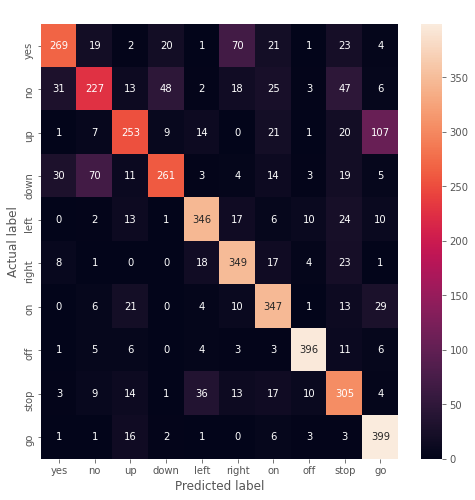

In [267]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

plot_Confusion_Matrix(testY.argmax(axis=1), predIdxs,"Confusion Matrix")

## Results

In [269]:


from tensorflow import keras
model = keras.models.load_model('C:/Users/Tuf F15/Desktop/DATASET/rawMethod')

In [270]:
result = model.evaluate(testX, testY)

134/134 [==============================] - 2s 13ms/step - loss: 1.2381 - accuracy: 0.7394


In [271]:
print("test loss, test acc:", result)


test loss, test acc: [1.2380784749984741, 0.7393854260444641]


In [272]:
pre=model.predict(testX)

134/134 [==============================] - 2s 10ms/step


In [273]:
testX.shape

(4263, 16000, 1)

In [274]:
import numpy as np

In [40]:
np.array(testX[0])

array([[[1.6439131e-02],
        [3.2036058e-03],
        [6.9001107e-06],
        ...,
        [1.7382833e-03],
        [1.8181238e-02],
        [7.9538431e-03]],

       [[2.2333496e+00],
        [2.6495774e+00],
        [7.1895704e+00],
        ...,
        [3.9924498e+00],
        [2.6459497e-01],
        [1.9882274e+00]],

       [[4.7733927e-01],
        [1.3411906e-01],
        [2.7221930e-01],
        ...,
        [6.4661765e-01],
        [6.5869182e-01],
        [3.8515028e-01]],

       ...,

       [[1.4618429e-06],
        [4.8097831e-06],
        [2.6808753e-05],
        ...,
        [2.9357649e-02],
        [1.0315610e-02],
        [1.6610391e-02]],

       [[1.5460306e-05],
        [1.0372002e-05],
        [2.9436571e-06],
        ...,
        [3.0490654e-03],
        [1.0702660e-02],
        [7.6590809e-03]],

       [[9.1252768e-06],
        [1.7467220e-05],
        [5.0652384e-06],
        ...,
        [2.2076201e-03],
        [3.4327505e-03],
        [2.2547960e-03]]

### TEST

In [290]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\test\test'

dataT = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    #file = audios[i]
    sample_rate, samples = wavfile.read(os.path.join(audios_dir,d))
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    # convert the image data to NumPy arrays while scaling the pixel
    # intensities to the range [0, 255]
    #image = np.array(image)/255.0
    
    if (samples.size == 16000):
                dataT.append(samples)
                labels.append(d)  # d est nom du dossier
    #else:
        #   print(spectrogram.shape)


c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [291]:
dataT

[array([-9, 54, 86, ..., 21, 19, 23], dtype=int16),
 array([-2,  0,  4, ...,  8,  2,  5], dtype=int16),
 array([  13,   60,  105, ..., -147, -150,  -68], dtype=int16),
 array([ -75,  -91, -104, ...,  182,  210,  177], dtype=int16),
 array([ 27,  32, -52, ...,   2,  38,  16], dtype=int16),
 array([14, 57, 58, ...,  0,  0,  0], dtype=int16),
 array([ -6, -12, -11, ...,   2,  -7, -11], dtype=int16),
 array([21, 28, 24, ...,  1, 13, 21], dtype=int16),
 array([ -26,  -24,  -18, ..., 2773, 2590, 2432], dtype=int16),
 array([-2, -4, -4, ..., -4,  1,  5], dtype=int16),
 array([ 0,  7, 20, ..., 15,  1, -1], dtype=int16),
 array([-115, -227, -186, ..., -301, -351, -197], dtype=int16),
 array([ 24, -49, -47, ..., -47, -93, -46], dtype=int16),
 array([-15, -33, -52, ..., -25, -25, -23], dtype=int16),
 array([   3,    3,    2, ..., -115, -147,  -72], dtype=int16),
 array([-1, -4, -6, ..., 11,  8,  7], dtype=int16),
 array([  0,  -9, -11, ...,   0,   0,   0], dtype=int16),
 array([ -4, -20, -12, ...

In [46]:
pre.shape

(4690, 10)

In [47]:
pre[0]

array([2.9752339e-04, 1.0840432e-03, 1.6671187e-03, 2.6360370e-04,
       4.9087014e-03, 1.0133242e-03, 8.7719999e-04, 1.4864685e-03,
       9.8769987e-01, 7.0213788e-04], dtype=float32)

In [48]:
np.argmax(pre[0])

8

In [295]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [296]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_00fe78fd9.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(samples)

dataS = np.array(dataS)

dataS = np.asarray(dataS).astype(np.float32)



In [297]:
dataS.shape

(1, 16000)

In [298]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 461ms/step


In [299]:
pre

array([[2.7453181e-10, 8.9085067e-12, 3.3679264e-19, 6.4053669e-16,
        1.2371783e-06, 1.5816253e-06, 1.7694179e-27, 9.9999714e-01,
        1.0071884e-12, 8.0477704e-26]], dtype=float32)

In [300]:
label_annot[np.argmax(pre[0])] 

'stop'

In [58]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_0a42cce82.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)



In [60]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [55]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [65]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [56]:
label_annot[np.argmax(pre[0])] 

'down'

In [63]:
from keras import backend as K


In [61]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)


c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [72]:
samples


array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-6353, -6353],
       [-7274, -7274],
       [-7034, -7034]], dtype=int16)

(2,)

In [62]:
frequencies

array([   0., 8000.])

In [58]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [66]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [59]:
label_annot[np.argmax(pre[0])] 

'yes'

In [119]:
import librosa

### Preprocessing Audio

In [304]:
from os import path
from pydub import AudioSegment, effects  
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
import soundfile
from shutil import copy2 as cp


In [305]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [306]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [429]:
# files                                                                         
src = r"C:\Users\Tuf F15\Desktop\DATASET\test1.mp3"
dst = r"C:\Users\Tuf F15\Desktop\DATASET\b.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\b.wav'>

In [413]:
# files                                                                         
src = r"C:\Users\Tuf F15\Desktop\DATASET\test4.m4a"
dst = r"C:\Users\Tuf F15\Desktop\DATASET\b.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_file(src,  format= 'm4a')
sound.export(dst, format="wav")

<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\b.wav'>

In [430]:

sound = AudioSegment.from_wav(r"C:\Users\Tuf F15\Desktop\DATASET\b.wav")
sound = sound.set_channels(1)
sound = sound.set_frame_rate(16000)
sound.export(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav", format="wav")


<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\output.wav'>

In [431]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")

<ipython-input-305-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([-722, -727, -776, ...,   43,   83,   59], dtype=int16), 16000)

In [432]:
from keras import backend as K

#### TEST 4 audios test1 - test2 - test3 - test4

test1 ==> actual: left      |       predicted: left                    
test2 ==> actual: right      |      predicted: go                     
test3 ==> actual: down      |    predicted: on                        
test4 ==> actual: stop      |       predicted: stop                         

In [433]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

In [434]:
sample_rate

16000

In [435]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")


In [436]:
dataS = []
dataS.append(samples)

dataS = np.array(dataS)
dataS = np.asarray(dataS).astype(np.float32)
dataS.shape


(1, 15680)

In [437]:
A = np.pad(dataS, pad_width=320 ,mode='constant')[320:]

In [438]:
dataS = dataS.copy()

In [439]:
dataS.resize(1,16000)

In [440]:
dataS.shape

(1, 16000)

In [441]:
dataS = dataS.reshape(dataS.shape[0],16000, 1)

In [442]:
dataS.shape

(1, 16000, 1)

In [443]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 35ms/step


In [444]:
label_annot[np.argmax(pre[0])] 

'yes'